In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load Excel file
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Customer_Segmentation.xlsx"
df = pd.read_excel(file_path)

# Display first few rows
df.head()

,CustomerID,Age,Gender,PurchaseHistory,Segment
0,1,56,Male,11,Medium
1,2,69,Male,7,High
2,3,46,Male,1,Low
3,4,32,Male,1,Low
4,5,60,Male,13,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       100 non-null    int64 
 1   Age              100 non-null    int64 
 2   Gender           100 non-null    object
 3   PurchaseHistory  100 non-null    int64 
 4   Segment          100 non-null    object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB
None
       CustomerID         Age  PurchaseHistory
count  100.000000  100.000000       100.000000
mean    50.500000   43.350000         9.030000
std     29.011492   14.904663         5.977153
min      1.000000   19.000000         1.000000
25%     25.750000   31.750000         3.000000
50%     50.500000   42.000000         8.000000
75%     75.250000   57.000000        16.000000
max    100.000000   69.000000        19.000000


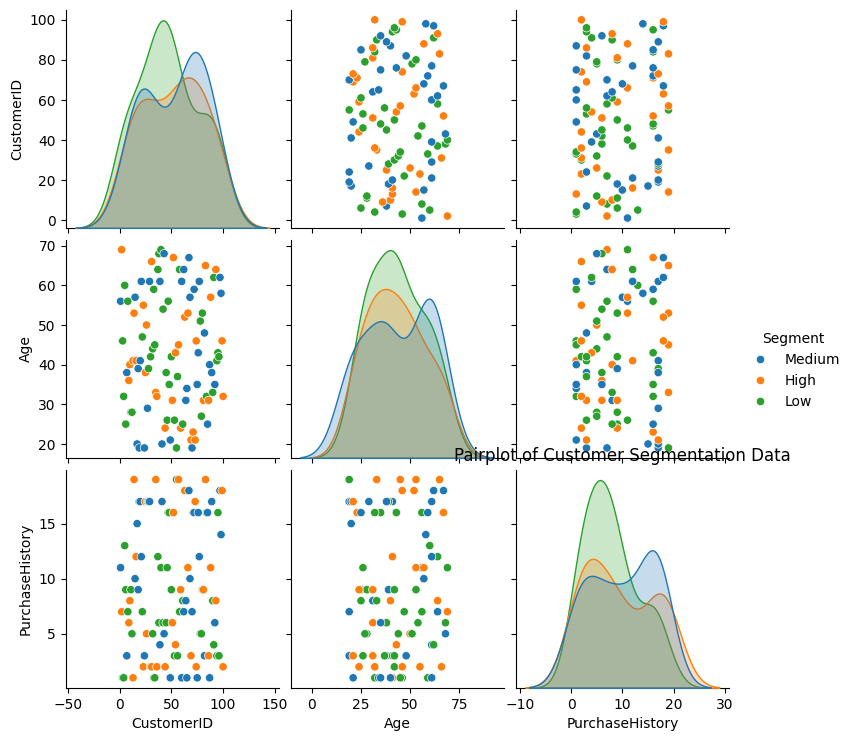

In [3]:
print(df.info())
print(df.describe())
sns.pairplot(df, hue="Segment")
plt.title("Pairplot of Customer Segmentation Data")
plt.show()

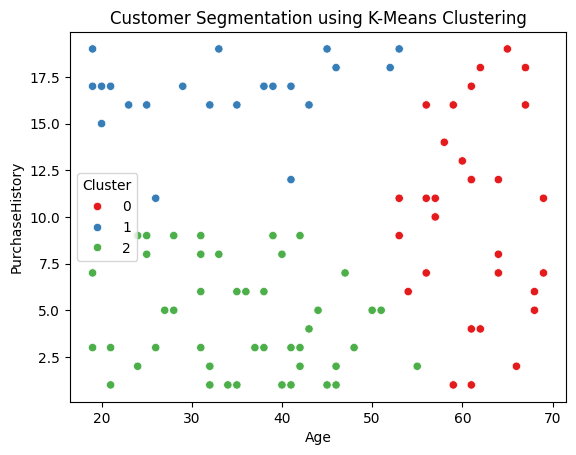

In [4]:
# Select numerical columns for clustering
features = ["Age", "PurchaseHistory"]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
sns.scatterplot(data=df, x="Age", y="PurchaseHistory", hue="Cluster", palette="Set1")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Age,Gender,PurchaseHistory,Segment,Cluster
0,1,56,Male,11,Medium,0
1,2,69,Male,7,High,0
2,3,46,Male,1,Low,2
3,4,32,Male,1,Low,2
4,5,60,Male,13,Low,0


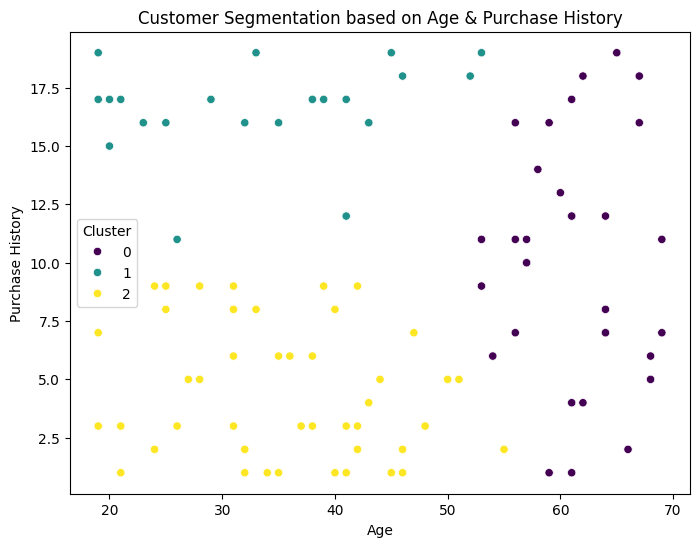

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Age", y="PurchaseHistory", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation based on Age & Purchase History")
plt.xlabel("Age")
plt.ylabel("Purchase History")
plt.show()

In [7]:
summary = df.groupby("Cluster")[["Age", "PurchaseHistory"]].mean().reset_index()
summary

,Cluster,Age,PurchaseHistory
0,0,61.218750,10.031250
1,1,33.956522,16.608696
2,2,35.444444,4.444444
